In [2]:
#Loading in code and data
from kinetic import KineticScan
from spatialScan import SpatialScan
from ss import SpatiallySeparated
import matplotlib.pyplot as plt
import glob
import re
import numpy as np
import time

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

In [4]:
#Getting all data
file = glob.glob('**/*.dat', recursive=True)
print(file)
AllDataObjs = []

for fpath in file:
    try:
        #Getting the file name and trimming .dat extention and /
        fname = re.search('[\\\/][^\\\/\n]+.dat', fpath)[0][1:-4]
        print(fname)
    except:
        print(f'ERROR: Could not open {fpath}: Bad re exspression')
        continue
        
    try:
        if 'KIN' in fname:
            data = KineticScan(filepath=fpath, label=fname)
        else:
            data = SpatialScan(filepath=fpath, label=fname)
        AllDataObjs.append(data)
    except Exception as e:
        print(f'ERROR: Could not read {fpath}: {e.__class__}')
        print(e)

print(f'--------------------------\nSuccesfully Loaded in {len(AllDataObjs)} .dat files')

['D1-5\\D5-R2-PDI-Nanocrystal-6-14-21-t0 _GV.dat', 'D1-5\\D5-R2-PDI-Nanocrystal-6-14-21-t0 _KIN.dat', 'D1-5\\D5-R3-PDI-Nanocrystal-6-14-21 _KIN.dat', 'D1-5\\D5-R3-PDI-Nanocrystal-6-14-21-t0_GV.dat', 'D1-5\\D5-R3-PDI-Nanocrystal-6-14-21-t0_KIN.dat', 'D1-5\\D1\\D1-PDI-Nanocrystal-r1_GV.dat', 'D1-5\\D1\\D1-PDI-Nanocrystal-r1_KIN.dat', 'D1-5\\D1\\D1-PDI-Nanocrystal-r1_NP.dat', 'D1-5\\D2\\D2-PDI-Nanocrystal-6-11-21 kin2_GV.dat', 'D1-5\\D2\\D2-PDI-Nanocrystal-6-11-21 kin2_KIN.dat', 'D1-5\\D2\\D2-PDI-Nanocrystal-6-11-21 kin2_NP.dat', 'D1-5\\D2\\D2-PDI-Nanocrystal-6-11-21 t0_GV.dat', 'D1-5\\D2\\D2-PDI-Nanocrystal-6-11-21 _NP.dat', 'D1-5\\D2\\D2-PDI-Nanocrystal-6-11-21_KIN.dat', 'D1-5\\D3\\D3-PDI-Nanocrystal-6-11-21 12.8uW r2_KIN.dat', 'D1-5\\D3\\D3-PDI-Nanocrystal-6-11-21 12.8uW r3_KIN.dat', 'D1-5\\D3\\D3-PDI-Nanocrystal-6-11-21 12.8uW_KIN.dat', 'D1-5\\D3\\D3-PDI-Nanocrystal-6-11-21 5uW r1_KIN.dat', 'D1-5\\D3\\D3-PDI-Nanocrystal-6-11-21 5uW r2_KIN.dat', 'D1-5\\D3\\D3-PDI-Nanocrystal-6-11-21 5u

D4-PDI-Nanocrystal-6-11-21 5uW r3_Multi-1_NP
D4-PDI-Nanocrystal-6-11-21 5uW r3_Multi-2_KIN
D4-PDI-Nanocrystal-6-11-21 5uW r3_Multi-2_NP
D4-PDI-Nanocrystal-6-11-21 5uW r3_Multi-3_KIN
D4-PDI-Nanocrystal-6-11-21 5uW r3_Multi-3_NP
D4-PDI-Nanocrystal-6-14-21-t0_GV
D4-PDI-Nanocrystal-6-14-21_NP
D5-R1-PDI-Nanocrystal-6-14-21-t0 k1_KIN
D5-R1-PDI-Nanocrystal-6-14-21-t0 k2_KIN
D5-R1-PDI-Nanocrystal-6-14-21-t0_GV
D5-R1-PDI-Nanocrystal-6-14-21-t0_NP
D3-PDI-Nanocrystal-6-11-21_AutoGalvo_t-100ps_GV
D3-PDI-Nanocrystal-6-11-21_AutoGalvo_t-100ps_NP
D3-PDI-Nanocrystal-6-11-21_AutoGalvo_t-10ps_GV
D3-PDI-Nanocrystal-6-11-21_AutoGalvo_t-10ps_NP
D3-PDI-Nanocrystal-6-11-21_AutoGalvo_t-15ps_GV
D3-PDI-Nanocrystal-6-11-21_AutoGalvo_t-15ps_NP
D3-PDI-Nanocrystal-6-11-21_AutoGalvo_t-1ps_GV
D3-PDI-Nanocrystal-6-11-21_AutoGalvo_t-1ps_NP
D3-PDI-Nanocrystal-6-11-21_AutoGalvo_t-40ps_GV
D3-PDI-Nanocrystal-6-11-21_AutoGalvo_t-40ps_NP
D3-PDI-Nanocrystal-6-11-21_AutoGalvo_t-5ps_GV
D3-PDI-Nanocrystal-6-11-21_AutoGalvo_t-5ps

D5-R2-PDI-Nanocrystal-6-14-21-t0 _GV; 0


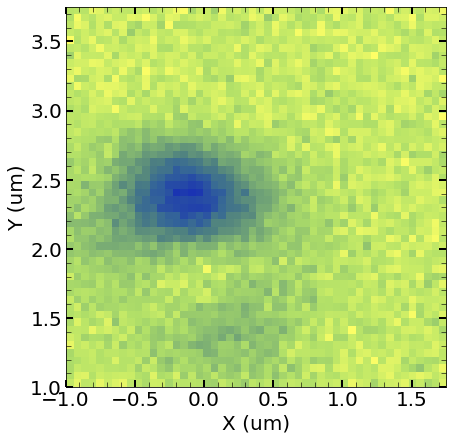

D5-R2-PDI-Nanocrystal-6-14-21-t0 _KIN; 1


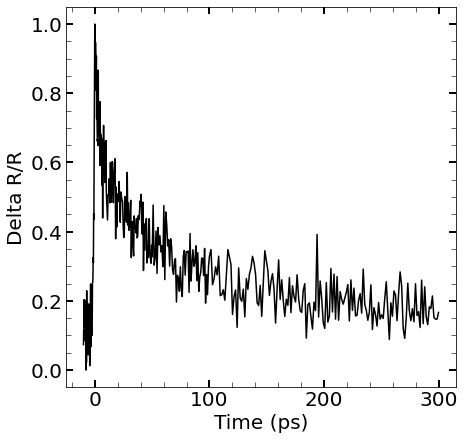

D5-R3-PDI-Nanocrystal-6-14-21 _KIN; 2


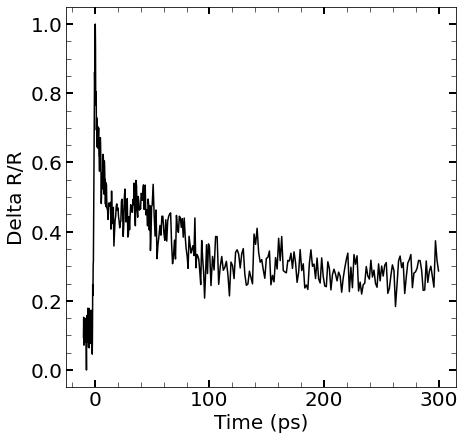

D5-R3-PDI-Nanocrystal-6-14-21-t0_GV; 3


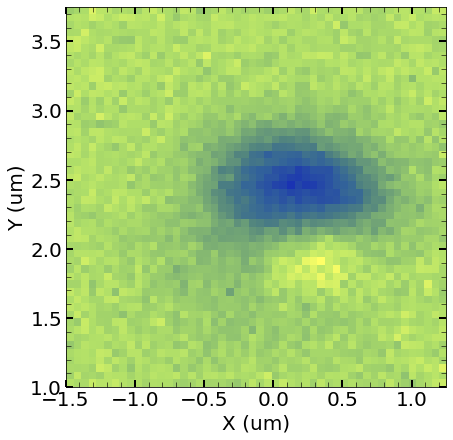

D5-R3-PDI-Nanocrystal-6-14-21-t0_KIN; 4


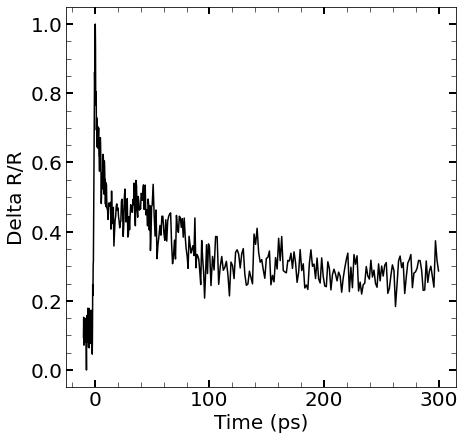

D5-R1-PDI-Nanocrystal-6-14-21-t0 k1_KIN; 36


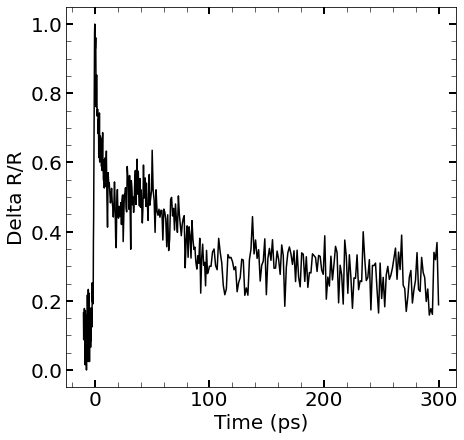

D5-R1-PDI-Nanocrystal-6-14-21-t0 k2_KIN; 37


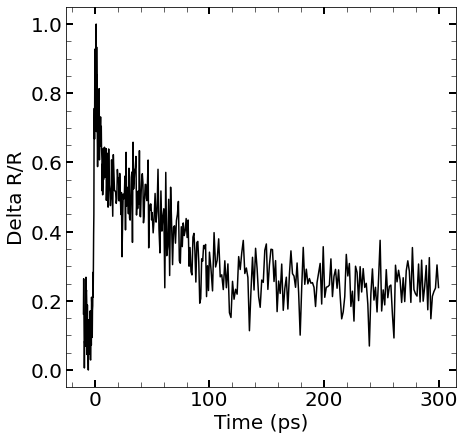

D5-R1-PDI-Nanocrystal-6-14-21-t0_GV; 38


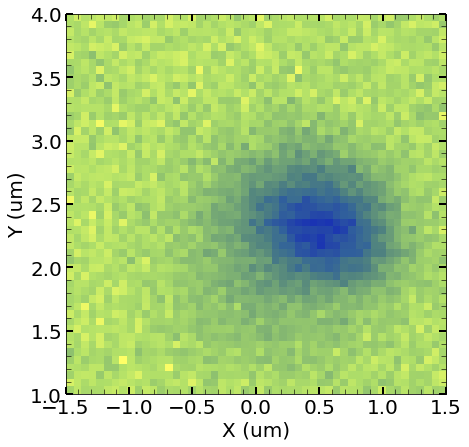

D5-R1-PDI-Nanocrystal-6-14-21-t0_NP; 39


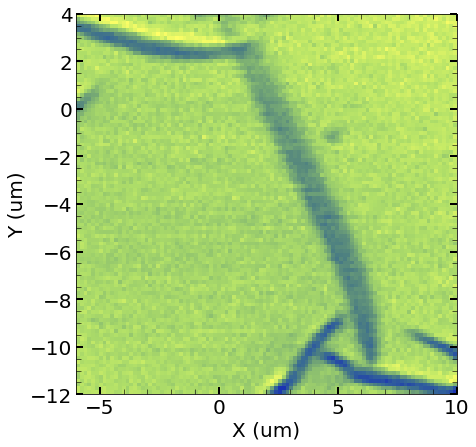

D5-R1-PDI-Nanocrystal-6-14-21-t0 k2_KIN; 125


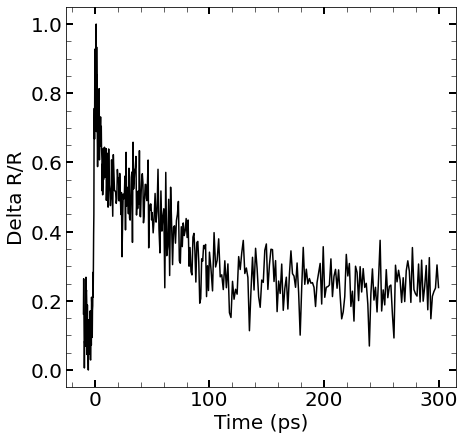

D5-R1-PDI-Nanocrystal-6-14-21-t0_GV; 126


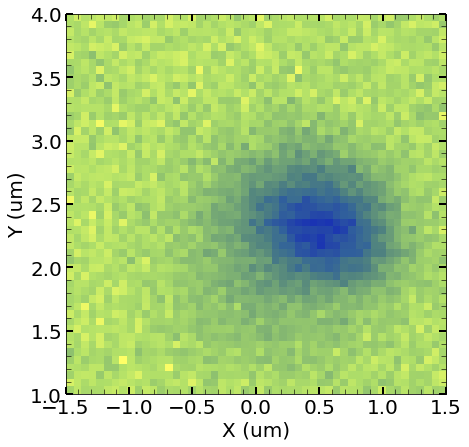

D5-R1-PDI-Nanocrystal-6-14-21-t0_NP; 127


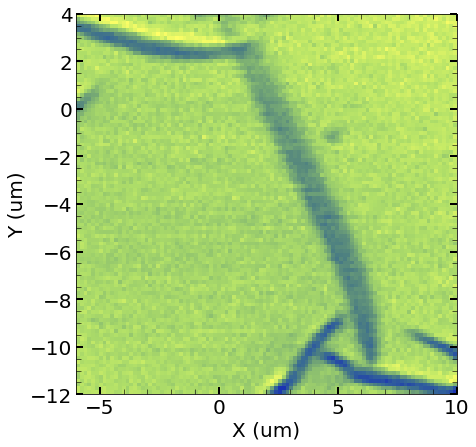

D5-R2-PDI-Nanocrystal-6-14-21-t0 _KIN; 128


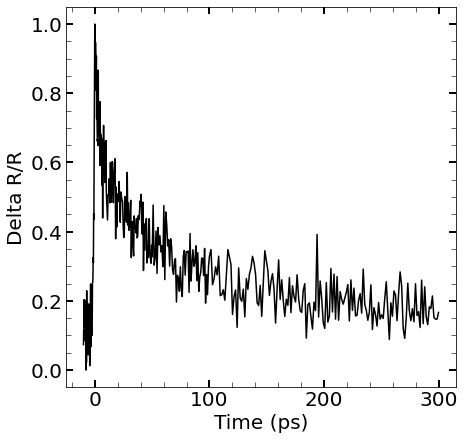

Imaged 172 .dat files in -2.589243173599243 s


In [5]:
#Plotting all D5 data to be looked through
start = time.time()

for i, o in enumerate(AllDataObjs):
    if 'D5' == o.get_label()[:2]:
        print(f'{o.get_label()}; {i}')
        ax = o.visualize()
        plt.show()
    
elapsed = start - time.time()

print(f'Imaged {len(AllDataObjs)} .dat files in {elapsed} s')
    

D5-R2-PDI-Nanocrystal-6-14-21-t0 _GV; 0
D5-R2-PDI-Nanocrystal-6-14-21-t0 _KIN; 1


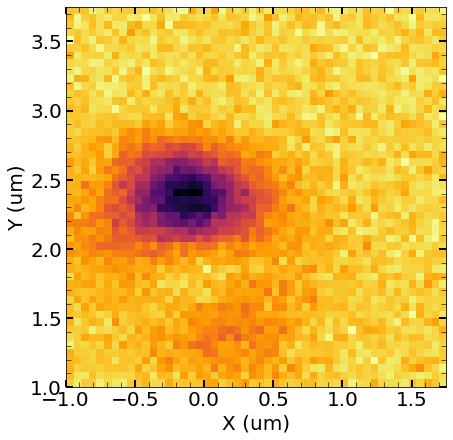

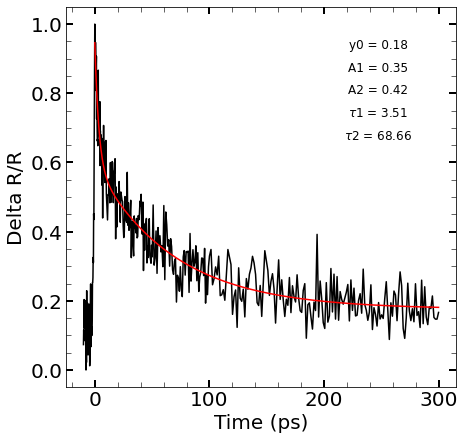

D5-R3-PDI-Nanocrystal-6-14-21 _KIN; 2


C:\Users\Emerson Wright\Documents\01. REU Materials\Data-Analysis-Tools\kinetic.py:92: RuntimeWarning: overflow encountered in exp
  res = y0 + A1*np.exp((-(x-x0))/r1) + A2*np.exp((-(x-x0))/r2)


<Figure size 504x504 with 0 Axes>

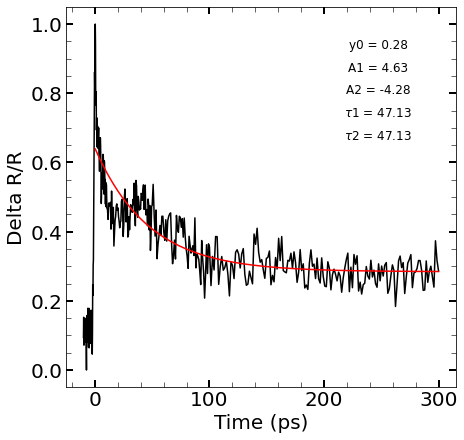

D5-R3-PDI-Nanocrystal-6-14-21-t0_GV; 3
D5-R3-PDI-Nanocrystal-6-14-21-t0_KIN; 4


C:\Users\Emerson Wright\Documents\01. REU Materials\Data-Analysis-Tools\kinetic.py:92: RuntimeWarning: overflow encountered in exp
  res = y0 + A1*np.exp((-(x-x0))/r1) + A2*np.exp((-(x-x0))/r2)


<Figure size 504x504 with 0 Axes>

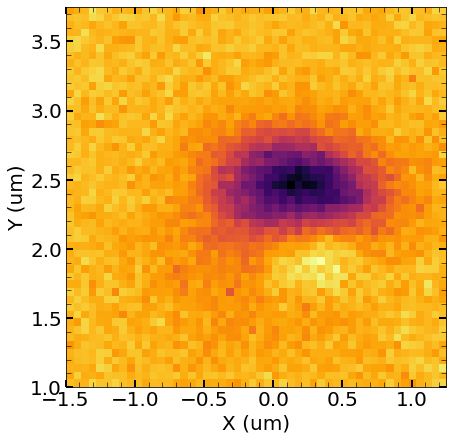

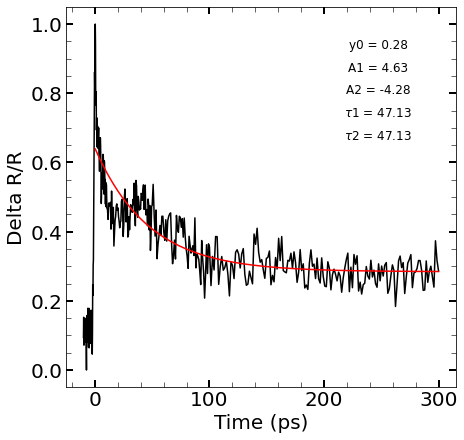

D5-R1-PDI-Nanocrystal-6-14-21-t0 k1_KIN; 36


C:\Users\Emerson Wright\Documents\01. REU Materials\Data-Analysis-Tools\kinetic.py:92: RuntimeWarning: overflow encountered in exp
  res = y0 + A1*np.exp((-(x-x0))/r1) + A2*np.exp((-(x-x0))/r2)


<Figure size 504x504 with 0 Axes>

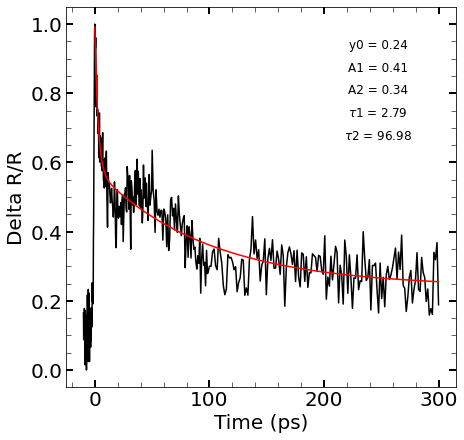

D5-R1-PDI-Nanocrystal-6-14-21-t0 k2_KIN; 37


<Figure size 504x504 with 0 Axes>

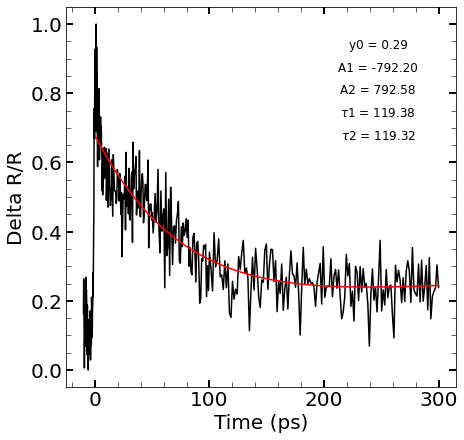

D5-R1-PDI-Nanocrystal-6-14-21-t0_GV; 38
D5-R1-PDI-Nanocrystal-6-14-21-t0_NP; 39
D5-R1-PDI-Nanocrystal-6-14-21-t0 k1_KIN; 163


C:\Users\Emerson Wright\Documents\01. REU Materials\Data-Analysis-Tools\kinetic.py:92: RuntimeWarning: overflow encountered in exp
  res = y0 + A1*np.exp((-(x-x0))/r1) + A2*np.exp((-(x-x0))/r2)


<Figure size 504x504 with 0 Axes>

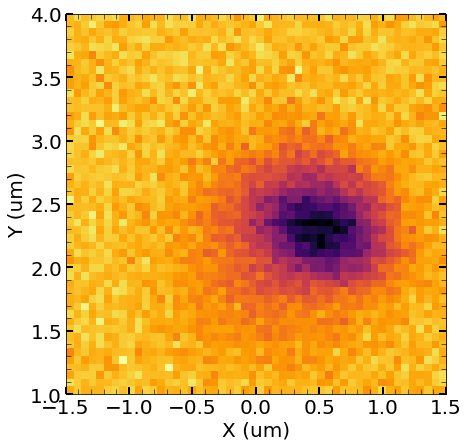

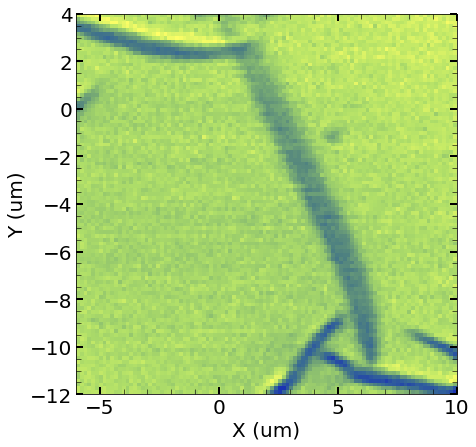

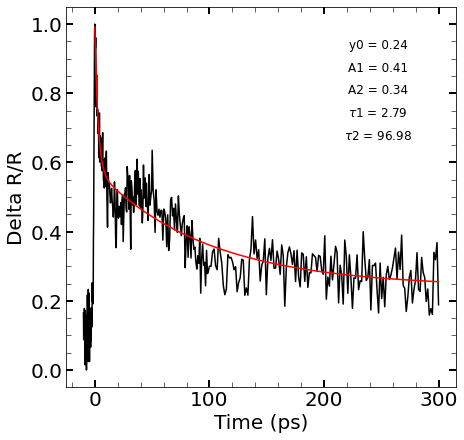

D5-R1-PDI-Nanocrystal-6-14-21-t0_NP; 164
D5-R2-PDI-Nanocrystal-6-14-21-t0 _KIN; 165


<Figure size 504x504 with 0 Axes>

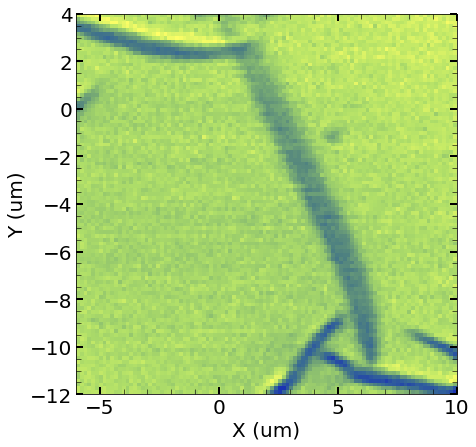

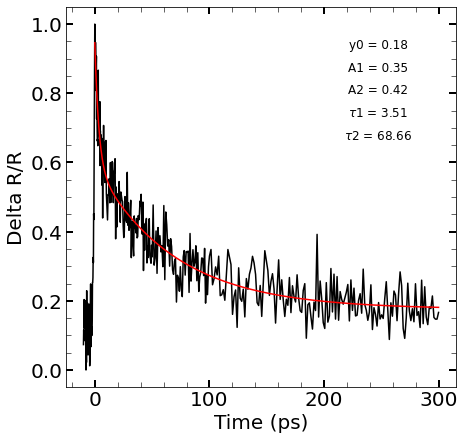

D5-R3-PDI-Nanocrystal-6-14-21 _KIN; 166


C:\Users\Emerson Wright\Documents\01. REU Materials\Data-Analysis-Tools\kinetic.py:92: RuntimeWarning: overflow encountered in exp
  res = y0 + A1*np.exp((-(x-x0))/r1) + A2*np.exp((-(x-x0))/r2)


<Figure size 504x504 with 0 Axes>

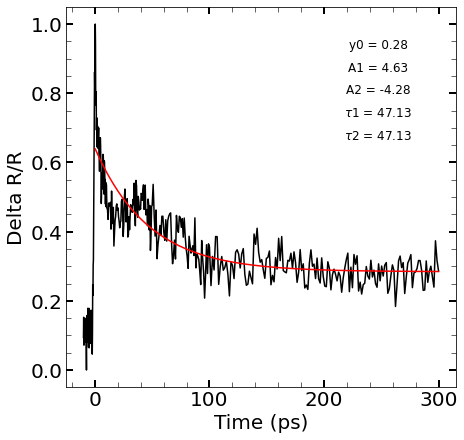

<Figure size 504x504 with 0 Axes>

In [6]:
#Saving t0 scans

for i, o in enumerate(AllDataObjs):
    fname = o.get_label()
    if 'AutoGalvo' in fname or 'D5' not in fname:
        continue
    print(f'{fname}; {i}')
    if 'GV' in fname:
        ax = o.visualize(cmap='inferno')
    else:
        ax = o.visualize()
    if 'KIN' in fname:
        params = o.fitCurve()
        o.plotFit()
        plt.show()
    plt.savefig(f'outputs/{fname}_noFit.png')



In [5]:
#Getting all the spots of D5 in the right order
spots = [[],[],[]]
sort = [[],[],[]]

for o in AllDataObjs:
    fname = o.get_label()
    if 'AutoGalvo' in fname and 'D5' in fname and 'GV' in fname:
        R = int(fname[1])-1
        spots[R].append(o)
        t = re.search('t-\d+', fname)[0][2:]
        sort[R].append(int(t))

spots = np.array(spots)
sort = np.array(sort)

for i, s in enumerate(sort):
    sortedIDX = np.argsort(s)
    print(sortedIDX)
    spots[i, :] =  spots[i,sortedIDX]
    for l in spots[i]:
        print(l.label)

[3 5 1 2 4 6 0]
R1_D5-PDI-Nanocrystal-6-14-21 _AutoGalvo_t-1ps_GV
R1_D5-PDI-Nanocrystal-6-14-21 _AutoGalvo_t-5ps_GV
R1_D5-PDI-Nanocrystal-6-14-21 _AutoGalvo_t-10ps_GV
R1_D5-PDI-Nanocrystal-6-14-21 _AutoGalvo_t-15ps_GV
R1_D5-PDI-Nanocrystal-6-14-21 _AutoGalvo_t-40ps_GV
R1_D5-PDI-Nanocrystal-6-14-21 _AutoGalvo_t-80ps_GV
R1_D5-PDI-Nanocrystal-6-14-21 _AutoGalvo_t-100ps_GV
[3 5 1 2 4 6 0]
R2_D5-PDI-Nanocrystal-6-14-21 _AutoGalvo_t-1ps_GV
R2_D5-PDI-Nanocrystal-6-14-21 _AutoGalvo_t-5ps_GV
R2_D5-PDI-Nanocrystal-6-14-21 _AutoGalvo_t-10ps_GV
R2_D5-PDI-Nanocrystal-6-14-21 _AutoGalvo_t-15ps_GV
R2_D5-PDI-Nanocrystal-6-14-21 _AutoGalvo_t-40ps_GV
R2_D5-PDI-Nanocrystal-6-14-21 _AutoGalvo_t-80ps_GV
R2_D5-PDI-Nanocrystal-6-14-21 _AutoGalvo_t-100ps_GV
[3 5 1 2 4 6 0]
R3_D5-PDI-Nanocrystal-6-14-21 R3_AutoGalvo_t-1ps_GV
R3_D5-PDI-Nanocrystal-6-14-21 R3_AutoGalvo_t-5ps_GV
R3_D5-PDI-Nanocrystal-6-14-21 R3_AutoGalvo_t-10ps_GV
R3_D5-PDI-Nanocrystal-6-14-21 R3_AutoGalvo_t-15ps_GV
R3_D5-PDI-Nanocrystal-6-14-21 

In [7]:
#Testing new function that does the same thing
R1 = SpatiallySeparated.mkGIF('D1-5/Spot/D5/R1')
R2 = SpatiallySeparated.mkGIF('D1-5/Spot/D5/R2')
R3 = SpatiallySeparated.mkGIF('D1-5/Spot/D5/R3')